## Predicting Credit Card Default Part I

### Introduction

This project seeks to accurately predict credit card default in the next period (next month). The dataset comprises credit card information of Taiwanese credit card holders and downloaded from UCI Machine Learning Repository. The dependent variable is a categorical variable, assigned 1 if there is default and 0 if no default. 

**Attribute Information**


X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment (from April to September, 2005) as follows: X6 = the repayment status in September(most recent), 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September (most recent), 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

**Details of the dataset can be found on UCI website** [UCI](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#)

## Using an Imabalanced Dataset

## Importing the Libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import preprocessing, metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel

In [56]:
data = pd.read_csv('default of credit card clients.csv', skiprows=1)

In [57]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [61]:
data = data.drop(["ID"],axis=1)

In [62]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [63]:
data.shape

(30000, 24)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [65]:
data.isnull().values.any()

False

## Data Preprocessing and Exploration

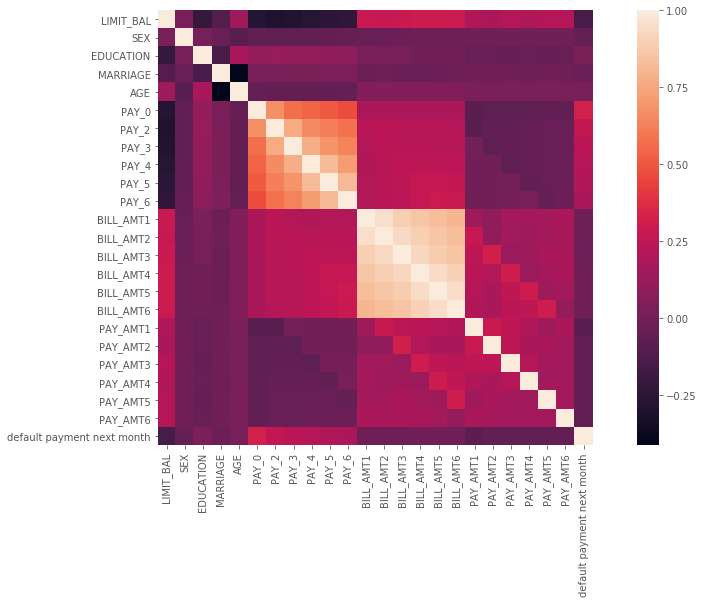

In [66]:
plt.rcParams['figure.figsize']=(16,8)
plt.style.use('ggplot')
cormat = data.corr()
sns.heatmap(cormat, square=True);

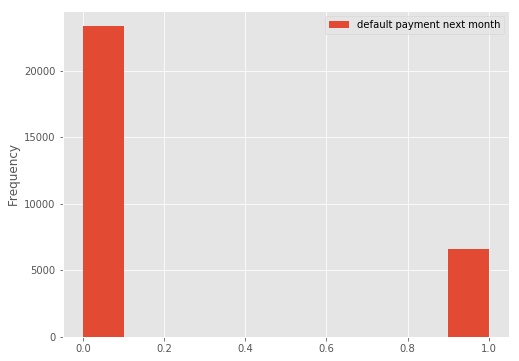

In [67]:
# Checking for Data Distribution and imbalanced data
data[["default payment next month"]].plot(kind="hist", figsize=(8,6))

In [68]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


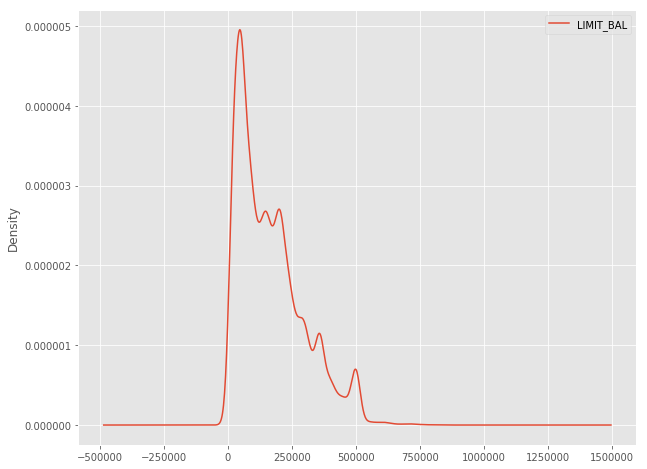

In [69]:
data[["LIMIT_BAL"]].plot(kind='kde', figsize=(10,8));

In [70]:
def boxed(X1, X2, X3, width=14):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,8))
    s = sns.boxplot(ax = ax1, x=X1, y=X2, hue=X3,
                data=data, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

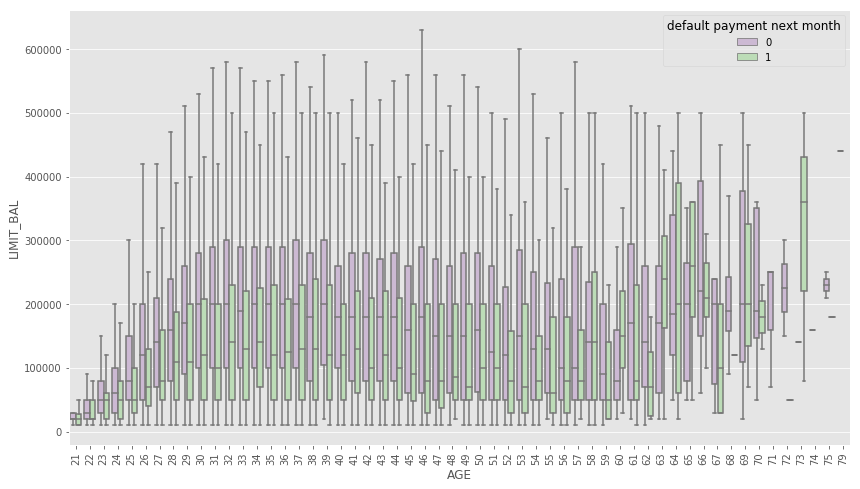

In [71]:
boxed('AGE','LIMIT_BAL', 'default payment next month',14)

**As expected, default is more common with higher amounts and more for ages within the working class.**

### Selecting the Features and Splitting the dataset

In [73]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22500, 23), (7500, 23), (22500,), (7500,))

### Scaling the Features

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the Algorithms

In [79]:
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr, use_features_in_secondary=True)

In [80]:
# Dictionary of different classifiers
clfs = {
'LogisticRegression' : LogisticRegression(),
'DecisionTree': DecisionTreeClassifier(),
'KNNClassifier': KNeighborsClassifier(),
'NaiveBayes': GaussianNB(),
'SupportVectorMachines': SVC(kernel="rbf"),
'Bagging': BaggingClassifier(),
'AdaBoostClassifier': AdaBoostClassifier(),
'RandomForestClassifier': RandomForestClassifier(),
'GradientBoostingClassifier': GradientBoostingClassifier(),
'XGBoost': XGBClassifier(),
'StackingClassifier': StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr, use_features_in_secondary=True)
}

In [81]:
# Testing all clfs models and generating a report
models_report = pd.DataFrame(columns = ['Model', 'Accuracy','Precision_score', 'Recall_score','F1_score', 'AUC'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred),
                     'AUC': metrics.roc_auc_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Accuracy,Precision_score,Recall_score,F1_score,AUC
0,LogisticRegression,0.812000,0.692035,0.240320,0.356752,0.605346
1,DecisionTree,0.726400,0.379193,0.409957,0.393975,0.612011
2,KNNClassifier,0.788400,0.518553,0.343577,0.413309,0.627603
3,NaiveBayes,0.673600,0.366504,0.692686,0.479370,0.680499
4,SupportVectorMachines,0.820933,0.667453,0.347880,0.457374,0.649932
5,Bagging,0.808133,0.600000,0.346650,0.439423,0.641314
6,AdaBoostClassifier,0.818133,0.662949,0.328826,0.439606,0.641256
7,RandomForestClassifier,0.804000,0.585792,0.329441,0.421715,0.632454
8,GradientBoostingClassifier,0.821867,0.652676,0.382299,0.482171,0.662970
9,XGBoost,0.821600,0.655879,0.373694,0.476116,0.659689


Given the imbalanced nature of the dataset, Accuracy alone does not present a robust measure of model performance, thus, other measures such as Precision, Recall, F1 and AUC are employed. Even after tuning the hyperparameters (please note RandomizedSearchCV was substituted for GridSearch to manage computational resources), performance across select models and metrics are not looking great. Therefore, Part II of the project attempted to solve challenges associated with imbalanced datasets utilizing classical methodologies which are highlighted at the end of the notebook with a link to Part II also provided.

## Cross Validation and Nested Cross Validation

Running GridSearch and Cross Validation on select models

### Logistic Regression

In [82]:
lr = LogisticRegression()
lr_params = {'C': [0.1, 10.0, 100, 1000]}
lr_grid = GridSearchCV(lr, lr_params, cv=5)
lr_grid.fit(X_train, y_train)
y_pred_lr = lr_grid.predict(X_test)
lr_nested_score = cross_val_score(lr_grid, X, y, cv=5)

In [83]:
lr_grid.best_params_

{'C': 0.1}

In [84]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_lr)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_lr)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_lr)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_lr)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_lr)))
lr_grid.best_params_

Accuracy Score is 0.812133
Precision Score is 0.693950
Recall Score is 0.239705
F1_score is 0.356327
AUC Score is 0.605209


{'C': 0.1}

In [85]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5873
           1       0.69      0.24      0.36      1627

   micro avg       0.81      0.81      0.81      7500
   macro avg       0.76      0.61      0.62      7500
weighted avg       0.79      0.81      0.77      7500



In [86]:
print ('Best params: ', lr_grid.best_params_)
print ('Best Accuracy on Train set: ', lr_grid.best_score_)
print ('Best Accuracy on Test set: ', lr_grid.score(X_test, y_test))

Best params:  {'C': 0.1}
Best Accuracy on Train set:  0.8098666666666666
Best Accuracy on Test set:  0.8121333333333334


In [87]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(lr_nested_score.mean(), lr_nested_score.std()))

mean of 0.778767 with std. dev. of 0.000116.


### Gradient Boosting

In [88]:
gb = GradientBoostingClassifier()
gb_params = {'n_estimators': np.arange(100,500,100),'learning_rate' : np.arange(0.01,0.1,0.02), 'max_depth':np.arange(3,9,2)}
#gb_grid = GridSearchCV(gb, gb_params, cv=5)
gb_grid = RandomizedSearchCV(gb, param_distributions=gb_params, refit=True)
gb_grid.fit(X_train, y_train)
y_pred_gb = gb_grid.predict(X_test)
#gb_nested_score = cross_val_score(gb_grid, X, y, cv=5)

In [89]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_gb)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_gb)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_gb)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_gb)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_gb)))
gb_grid.best_params_

Accuracy Score is 0.822933
Precision Score is 0.659552
Recall Score is 0.379840
F1_score is 0.482059
AUC Score is 0.662762


{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.06999999999999999}

In [90]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      5873
           1       0.66      0.38      0.48      1627

   micro avg       0.82      0.82      0.82      7500
   macro avg       0.75      0.66      0.69      7500
weighted avg       0.81      0.82      0.80      7500



In [91]:
print ('Best params: ', gb_grid.best_params_)
print ('Best Accuracy on Train set: ', gb_grid.best_score_)
print ('Best Accuracy on Test set: ', gb_grid.score(X_test, y_test))

Best params:  {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.06999999999999999}
Best Accuracy on Train set:  0.8203555555555555
Best Accuracy on Test set:  0.8229333333333333


In [93]:
#print("mean of {0:6f} with std. dev. of {1:6f}.".format(gb_nested_score.mean(), gb_nested_score.std()))

### Support Vector Machines

In [94]:
svm = SVC(kernel='rbf')
#{'C': [0.1,1,100], 'gamma':[0.001,0.01,0.1,10]}
svm_params = {'C': [0.1,1,100], 'gamma':[0.001,0.01,0.1,10]}
#svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid = RandomizedSearchCV(svm, param_distributions=svm_params, refit=True)
svm_grid.fit(X_train, y_train)
y_pred_svm = svm_grid.predict(X_test)
#svm_nested_score = cross_val_score(svm_grid, X, y, cv=3)

In [95]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_svm)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_svm)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_svm)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_svm)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_svm)))
svm_grid.best_params_

Accuracy Score is 0.821067
Precision Score is 0.664360
Recall Score is 0.354026
F1_score is 0.461909
AUC Score is 0.652239


{'gamma': 0.1, 'C': 1}

In [96]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.35      0.46      1627

   micro avg       0.82      0.82      0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500



In [97]:
print ('Best params: ', svm_grid.best_params_)
print ('Best Accuracy on Train set: ', svm_grid.best_score_)
print ('Best Accuracy on Test set: ', svm_grid.score(X_test, y_test))

Best params:  {'gamma': 0.1, 'C': 1}
Best Accuracy on Train set:  0.8185333333333333
Best Accuracy on Test set:  0.8210666666666666


In [98]:
#print("Accuracy mean of {0:6f} with std. dev. of {1:6f}.".format(svm_nested_score.mean(), svm_nested_score.std()))

## Part II

**The second part of this project utilizes classical techniques to solve the problem of imbalanced dataset, among which are:**
- Ensemble Methods (also adopted here)
- Random oversampling of the undersampled class
- Hyperparameter tuning using GridSearch
- More visualizations such as the lift and roc curves
- Artificial Neural Network
- Feauture Selection and Importance

Link to Part II can be found here [Part II](https://github.com/adiari1/ML-Projects/blob/master/Credit%20Card%20Default%20Prediction%20Part%20II.ipynb)